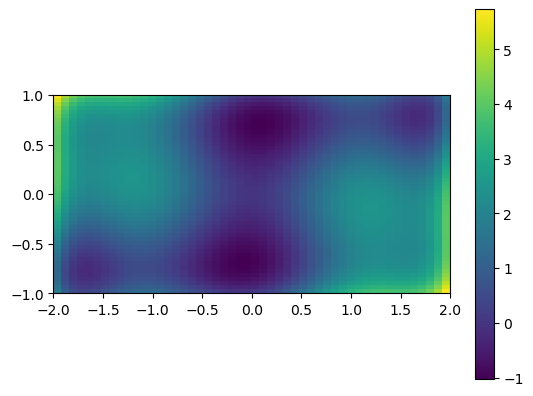

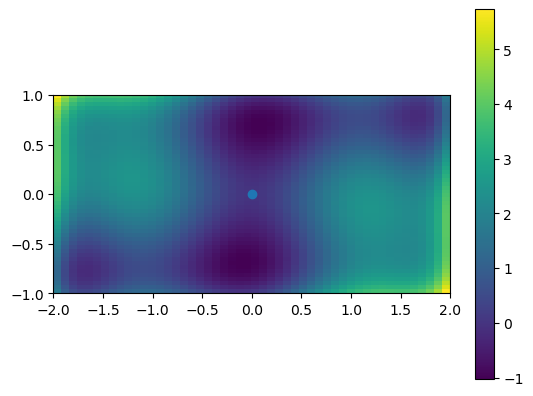

In [5]:
#Q1
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


def Six_Hump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + 4*x[1]**2) * x[1] **2)

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
x1, y1 = np.meshgrid(x, y)
# ploting
plt.figure()
plt.imshow(Six_Hump([x1, y1]), extent=[-2, 2, -1, 1])
plt.colorbar()
global_min = optimize.minimize(Six_Hump, x0=[0, 0])

plt.figure()
plt.imshow(Six_Hump([x1, y1]), extent=[-2, 2, -1, 1])
plt.colorbar()
plt.scatter(global_min.x[0], global_min.x[1])
plt.show()

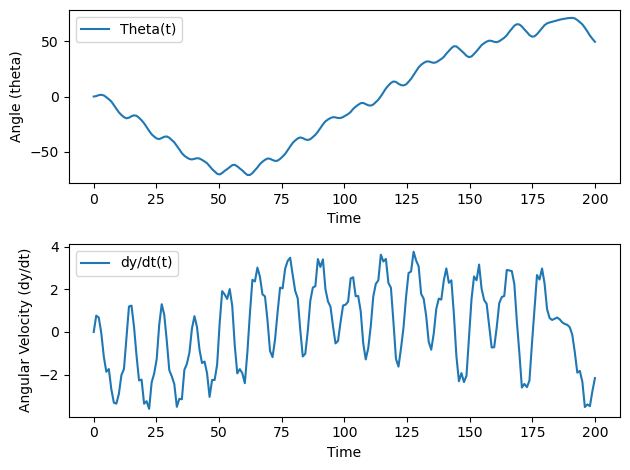

In [4]:
#Q2
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the function representing the system of ODEs
def pendulum_equations(y, t, gamma, omega_0, F_0, omega):
    theta, dydt = y
    dtheta_dt = dydt
    dydt = -gamma * dydt - omega_0**2 * np.sin(theta) + F_0 * np.cos(omega * t)
    return [dtheta_dt, dydt]

# Set parameters
gamma = 0.1
omega_0 = 1.0
F_0 = 1.0
omega = 0.5

# Set initial conditions
initial_conditions = [0.0, 0.0]  # theta(0) = 0, dy/dt(0) = 0

# Set time points
t = np.linspace(0, 200, 200)

# Solve the ODEs
solution = odeint(pendulum_equations, initial_conditions, t, args=(gamma, omega_0, F_0, omega))

# Extract the solutions for theta and y
theta, y = solution.T

# Plot the results for theta and y
plt.subplot(2, 1, 1)
plt.plot(t, theta, label='Theta(t)')
plt.xlabel('Time')
plt.ylabel('Angle (theta)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, y, label='dy/dt(t)')
plt.xlabel('Time')
plt.ylabel('Angular Velocity (dy/dt)')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
#Q4
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from matplotlib.colors import LogNorm

image = plt.imread("images/moonlanding.png")
plt.imshow(image,plt.cm.gray)
plt.title('moonlanding image')
plt.figure()

fft2_image = fftpack.fft2(image)
plt.imshow(np.abs(fft2_image), norm=LogNorm(vmin=5))
plt.title('FFT')
plt.colorbar()
plt.figure()

keep_fraction = 0.1
im_fft2 = fft2_image.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
plt.figure()
plt.imshow(np.abs(im_fft2), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Filtered Spectrum')

fft2_new = fftpack.ifft2(im_fft2).real
plt.figure()
plt.imshow(fft2_new, plt.cm.gray)
plt.title('Resulting Image')